In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
tr = pd.read_csv('D:\download\hw5.csv')
data = pd.DataFrame (tr)

In [3]:
summary = data.describe()
print(summary)

           SVENF01      SVENF02      SVENF03      SVENF04      SVENF05  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000   
mean      3.785311     4.258972     4.669363     5.022430     5.318493   
std       2.648060     2.498137     2.341348     2.221632     2.137801   
min       0.072700     0.327300     0.630300     1.013000     1.424500   
25%       1.144050     1.865600     2.536550     3.023050     3.544700   
50%       3.986500     4.393300     4.505500     4.718900     5.051300   
75%       5.901500     6.221250     6.461300     6.626600     6.779550   
max       9.813800     9.887800    10.145600    10.459900    10.649900   

           SVENF06      SVENF07      SVENF08      SVENF09      SVENF10  ...  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000  ...   
mean      5.559644     5.750071     5.895135     6.000596     6.072112  ...   
std       2.080405     2.040337     2.010786     1.987244     1.966960  ...   
min       1.69820

In [4]:
nrow= len(data.index)
ncol= len(data.columns)
print("Number of Rows of Data =" , nrow, '\n')
print("Number of Columns of Data =" ,ncol)

Number of Rows of Data = 8071 

Number of Columns of Data = 32


In [5]:
#Determine which attributes are categorical and which are numeric
data.dtypes

Date          object
SVENF01      float64
SVENF02      float64
SVENF03      float64
SVENF04      float64
SVENF05      float64
SVENF06      float64
SVENF07      float64
SVENF08      float64
SVENF09      float64
SVENF10      float64
SVENF11      float64
SVENF12      float64
SVENF13      float64
SVENF14      float64
SVENF15      float64
SVENF16      float64
SVENF17      float64
SVENF18      float64
SVENF19      float64
SVENF20      float64
SVENF21      float64
SVENF22      float64
SVENF23      float64
SVENF24      float64
SVENF25      float64
SVENF26      float64
SVENF27      float64
SVENF28      float64
SVENF29      float64
SVENF30      float64
Adj_Close    float64
dtype: object

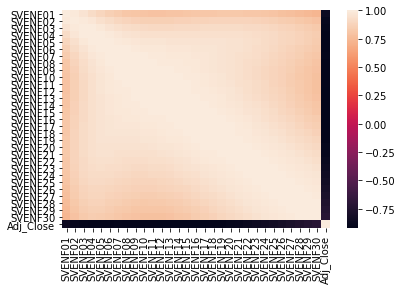

In [49]:
import seaborn as sns
cols = data.columns.values
cm = np.corrcoef(data.values.T)
hm = sns.heatmap(cm,cbar=True,xticklabels=cols,yticklabels=cols)

When principal components is 30, explained variance ratio is  
 [9.24583923e-01 3.80677290e-02 3.09538182e-02 5.43517622e-03
 8.68144161e-04 7.94583264e-05 1.03765359e-05 1.27869215e-06
 8.79077503e-08 7.03447249e-09 4.86308839e-10 3.78642587e-11
 9.41508611e-12 8.34809769e-12 8.25960054e-12 8.03266324e-12
 7.70614606e-12 7.56011984e-12 7.26380604e-12 7.23209175e-12
 7.10434227e-12 6.97572590e-12 6.80080348e-12 6.59628969e-12
 6.49636648e-12 6.45098998e-12 6.22737273e-12 6.06291088e-12
 5.91112972e-12 5.30801289e-12]


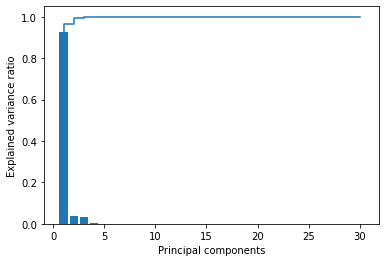

In [32]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from time import process_time
sc= StandardScaler()
X= data.iloc[:,1:-1].values
X_std= sc.fit_transform(X)
y= data['Adj_Close'].values
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.15, random_state= 42)

pca=PCA()
X_train_pca= pca.fit_transform(X_train)
X_test_pca= pca.fit_transform(X_test)
list_ratio= pca.explained_variance_ratio_
print("When principal components is 30, explained variance ratio is  \n", list_ratio)
plt.bar(range(1, 31), list_ratio)
plt.step(range(1, 31), np.cumsum(list_ratio))
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()

When principal components is 3, explained variance ratio is  
 [0.9251148  0.03768718 0.0312101 ]


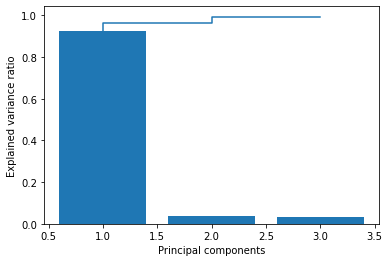

[0.9251148  0.96280198 0.99401208]


In [42]:
pca = PCA(n_components=3)
X_train_pca_new = pca.fit_transform(X_train)
X_test_pca_new = pca.transform(X_test)
list_ratio_new = pca.explained_variance_ratio_
print("When principal components is 3, explained variance ratio is  \n", list_ratio_new)
plt.bar(range(1, 4), list_ratio_new)
plt.step(range(1, 4), np.cumsum(list_ratio_new))
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()
#print(np.cumsum(list_ratio_new))

In [41]:
#Linear Regression original
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

start= process_time()
X= data.iloc[:,1:-1].values
y= data['Adj_Close'].values
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.15, random_state= 42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_train_pred= reg.predict (X_train)
y_test_pred= reg.predict(X_test) 
stop= process_time()
print ('Slope:',reg.coef_,'\n')
print ('Intercept:',reg.intercept_,'\n')
print ('Time: ', stop-start)

#MSE
print("RMSE train: ",math.sqrt(mean_squared_error(y_train,y_train_pred)))
print("RMSE test: ",math.sqrt(mean_squared_error(y_test,y_test_pred)))

#R2 score
print("R2 train: ", r2_score(y_train,y_train_pred))
print("R2 test: ", r2_score(y_test,y_test_pred))

Slope: [  -4.83843828   53.15886154 -249.77609515  590.39765971 -686.96356431
  228.0988777   289.2937007  -302.62642323  -44.31624559  320.69207748
 -288.3692738   200.16366115   -0.89256856  -86.94013339  -96.64031266
   -7.50513023 -302.47703105  216.50764237  136.90241245  133.63875554
  562.97736489 -387.63320904  176.17955174 -418.55197044 -795.41172644
  238.7673055   102.69781344  839.17533861  -80.32795402 -336.50681657] 

Intercept: 11.80749277960743 

Time:  0.046875
RMSE train:  0.7766533040369971
RMSE test:  0.782369585505904
R2 train:  0.902273035340041
R2 test:  0.9041309535336901


In [37]:
#LinearRegression PCA 
start= process_time()
reg.fit(X_train_pca_new, y_train)
y_train_pred= reg.predict (X_train_pca_new)
y_test_pred = reg.predict (X_test_pca_new)
stop = process_time()
print ('Slope:',reg.coef_,'\n')
print ('Intercept:',reg.intercept_,'\n')
print ('Time: ', stop-start,'\n')

#MSE
print("RMSE train: ",math.sqrt(mean_squared_error(y_train,y_train_pred)))
print("RMSE test: ",math.sqrt(mean_squared_error(y_test,y_test_pred)))

#R2 score
print("R2 train: ", r2_score(y_train,y_train_pred))
print("R2 test: ", r2_score(y_test,y_test_pred))

Slope: [-0.21712935 -0.24741687  0.00829614] 

Intercept: 5.498157104373181 

Time:  0.015625 

RMSE train:  0.9041938136836064
RMSE test:  0.9231445941473359
R2 train:  0.867540508213125
R2 test:  0.8665268372481363


In [38]:
#SVM 30
from sklearn import svm
svr = svm.SVR(kernel='linear')
start = process_time()
svr.fit (X_train, y_train)
y_train_pred= svr.predict (X_train)
y_test_pred = svr.predict (X_test)
stop = process_time()
print("Time: ", stop-start)

#MSE
print("RMSE train: ", math.sqrt(mean_squared_error(y_train,y_train_pred)))
print("RMSE test: ", math. sqrt(mean_squared_error(y_test,y_test_pred)))

#R2 score
print("R2 train: ", r2_score(y_train,y_train_pred))
print("R2 test: ", r2_score(y_test,y_test_pred))

Time:  12.015625
RMSE train:  0.8114400606667871
RMSE test:  0.8209525019114915
R2 train:  0.8933224798000513
R2 test:  0.8944421462564813


In [40]:
#SVM 3
start = process_time()
svr.fit (X_train_pca_new, y_train)
y_train_pred= svr.predict (X_train_pca_new)
y_test_pred = svr.predict (X_test_pca_new)
stop = process_time()
print("Time: ", stop-start,'\n')

#MSE
print("RMSE train: ", math.sqrt(mean_squared_error(y_train,y_train_pred)))
print("RMSE test: ", math.sqrt(mean_squared_error(y_test,y_test_pred)))

#R2 score
print("R2 train: ", r2_score(y_train,y_train_pred))
print("R2 test: ", r2_score(y_test,y_test_pred))

Time:  10.84375 

RMSE train:  0.9208901174937838
RMSE test:  0.9409194898027152
R2 train:  0.8626035073653322
R2 test:  0.8613373746224552
